# Case Study - Titanic


## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Check Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
In this challenge, we will complete the analysis of what sorts of people were likely to survive. 

In addition, we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. This step is often mixed with the next step, Data Preparation.

### Data Dictionary
The data is in a csv file titanic.csv. 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | male/femail |	
| Age | Age | in years |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.



### Load Data

This dataset is in titanic.csv. Make sure the file is in current folder. Please download the file from [here](https://github.com/data-lessons/python-business/tree/gh-pages/data) if you haven't done so yet.

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [102]:
df_titanic = pd.read_csv('titanic-231005-181053.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [103]:
# check the shape of the data
df_titanic.shape

(891, 12)

### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


##### Task1: Check out Basic Dataframe Info

Hint: info() function.

Discuss missing values in the dataframe.

In [104]:
# check the data info
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


##### Task2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [105]:
# stripping the $ sign
df_titanic["Fare"] = df_titanic["Fare"].astype(str).str.replace("$","")
# convert datatype to float
df_titanic["Fare"] = df_titanic["Fare"].astype(float)
df_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
# check the information about the new dataframe
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Task3: Check out statistics of Numeric Columns

Hint:describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [107]:
# check the descriptive statistics of the dataframe
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Description
### Age
- The average age of the passengers were around 29 and 30 implies alot of youth passengers onboard the voyage
- The minimum age onboard was less than 1 and the max was 80
- The age distribution was a normal distribution
- We learnt from the business case story that children had a higher chance of survial in the entire passenger population

### SibSp
- Most passengers did not have either their siblings or spouse onboard

### Parch
- Few people had their parents or children onboard

### Fare Statistics
- The average fare was $32.20
- The min fare was 0 and the max fare was $512.3292
- Upper-class passengers were the people who paid the highest fare

### Survived
- Since the mean of the Survived Column isn't close to 1 we can conclude that most of the passengers didn't survive the shipwreck 

### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analysis Survived as univariant. Relationship between Sex and Survival, Embarked and Survivval.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.

Survived
0    549
1    342
Name: PassengerId, dtype: int64

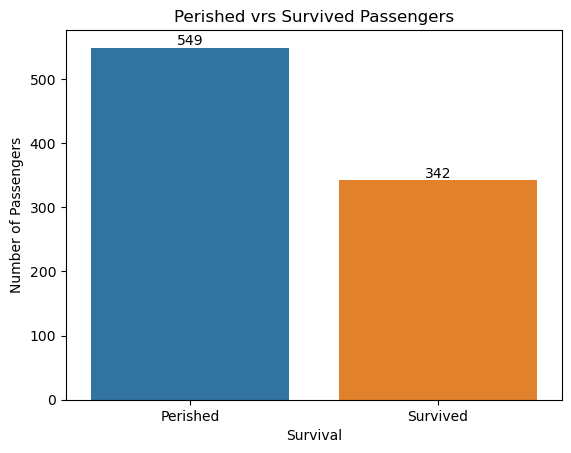

In [108]:
# plot barplot with seaborn
survived_count= df_titanic.groupby('Survived')['PassengerId'].count()
bar_plot = sns.barplot(x=df_titanic['Survived'],y=survived_count, data=df_titanic)
# label data bars
for i,j in enumerate(survived_count):
    bar_plot.text(i,j+0.1,str(j),fontdict={'size':10},ha='center',va='bottom')
bar_plot.set_xticklabels(['Perished','Survived'],rotation=0)
plt.title("Perished vrs Survived Passengers")
plt.xlabel("Survival")
plt.ylabel("Number of Passengers")

    
# df_titanic['Survived'].plot
survived_count

#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task5: Plot Bar Chart on Number of Male and Femal Passengers

Sex
female    314
male      577
Name: PassengerId, dtype: int64

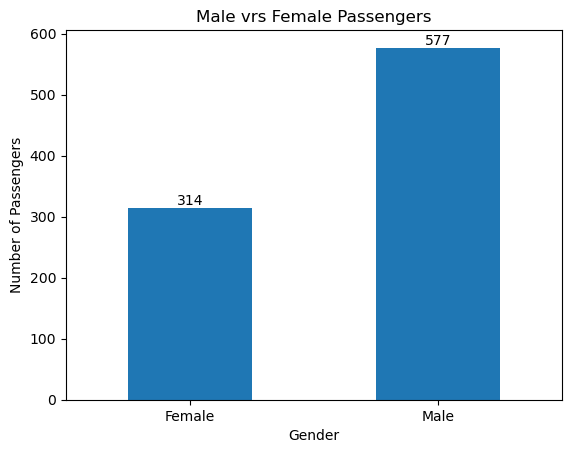

In [109]:
# perform count on the Sex 
gender_dist= df_titanic.groupby('Sex')['PassengerId'].count()
# plot a barb graph
gender_plot =gender_dist.plot(kind="bar")

# label data bars
for i,j in enumerate(gender_dist):
    gender_plot.text(i,j+0.1,str(j),fontdict={'size':10},ha='center',va='bottom')

gender_plot.set_xticklabels(['Female','Male'],rotation=0)
plt.title("Male vrs Female Passengers")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
gender_dist

##### Task6: Groupby Sex to Find Survival Rate of Male and Female

In [116]:
survived_passengers = df_titanic[df_titanic["Survived"] == 1]
survival_by_sex = survived_passengers.groupby('Sex')['Survived'].count()
passengers_survived = survived_passengers.shape[0]
survival_rate_by_sex = (survival_by_sex / passengers_survived)*100
survival_rate_by_sex


Sex
female    68.128655
male      31.871345
Name: Survived, dtype: float64

<Axes: title={'center': 'Survival Rate By Sex'}, ylabel='Survived'>

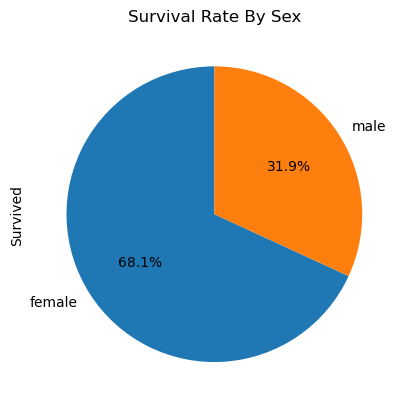

In [117]:
# Visualize the survival rate by pie chart
survival_rate_by_sex.plot(kind='pie',title='Survival Rate By Sex',autopct='%1.1f%%',startangle=90)

- There was a lot of females who survived as compared to the number of males who compared
- female - 68.1287 %
- male - 31.8713%


##### Task7: Plot Perished vs. Survived Bar for Male and Femail
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.

Text(0, 0.5, 'Number of Passengers')

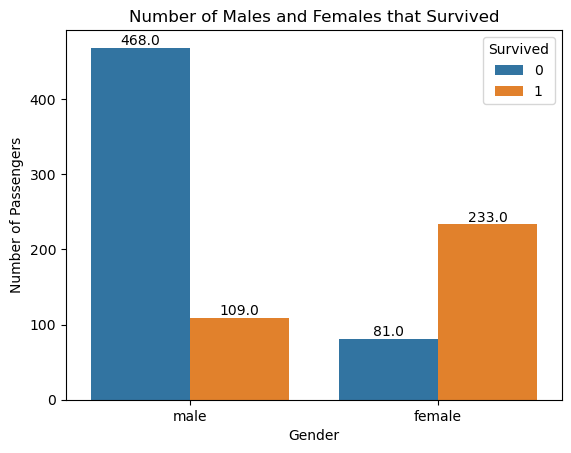

In [118]:
# count plot by sex and survival rate
count_plot = sns.countplot(x='Sex',hue ='Survived',data=df_titanic)
# Add labels on top of bars
for i in count_plot.patches:
    count_plot.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()),
                        ha='center', va='center', xytext=(0,5), textcoords='offset points', fontsize=10)

gender_plot.set_xticklabels(['Female','Male'],rotation=0)
plt.title("Number of Males and Females that Survived")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")

The number of men on the ship is lot more than the number of women. Still the number of survived women is almost twice the number of survived males. Majority women survived while vast majority of men perished.

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [122]:
# Survival Rates of each Pclass
survived_passengers = df_titanic[df_titanic["Survived"] == 1]
# count the survival by Pclass
survival=survived_passengers.groupby(by="Pclass")["PassengerId"].count()
# calculate the rate of survival
survival_rate_by_Pclass = (survival/survived_passengers.shape[0]) * 100
survival_rate_by_Pclass

Pclass
1    39.766082
2    25.438596
3    34.795322
Name: PassengerId, dtype: float64

- From the information, it seen the Passengers with upper class had the higher rate of survival
- Implies the fare ticket had effect on survival rate, the more you pay for the ticket the more the chance of survival 

<Axes: title={'center': 'Survival Rate By Pclass'}, ylabel='PassengerId'>

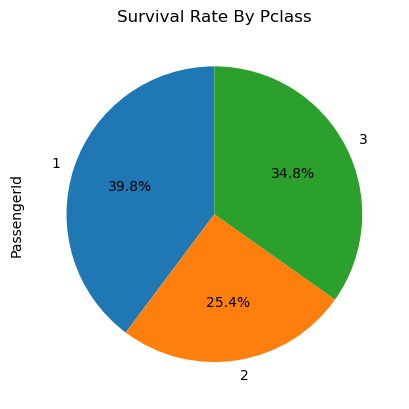

In [124]:
# Visualize the survival rate by pie chart
survival_rate_by_Pclass.plot(kind='pie',title='Survival Rate By Pclass',autopct='%1.1f%%',startangle=90)

##### Task 9: Plot Perished vs. Survived for each Pclass

Text(0, 0.5, 'Number of Passengers')

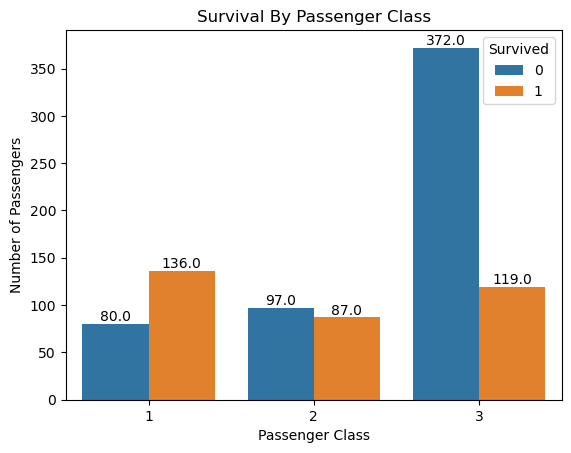

In [32]:
plot_pclass = sns.countplot(x='Pclass',hue ='Survived',data=df_titanic)
# Add labels on top of bars
for i in plot_pclass.patches:
    plot_pclass.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()),
                        ha='center', va='center', xytext=(0,5), textcoords='offset points', fontsize=10)
# graph settings
gender_plot.set_xticklabels(['Survival','Male'],rotation=0)
plt.title("Survival By Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")

### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NnN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Series.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.

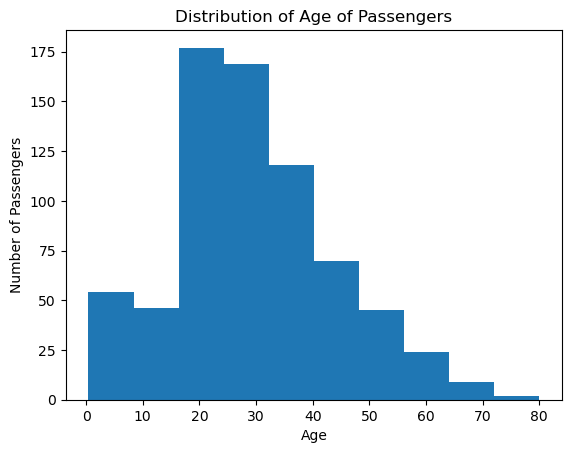

In [125]:
# hist plot on Age Column
dist_by_age = df_titanic['Age'].plot(kind='hist')
# sns.histplot(data=df_titanic,x=df_titanic['Age'],kde=True)
# df_titanic['Age'].plot(kind="hist",kde=True)
plt.title("Distribution of Age of Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")

# show plot
plt.show()

- The Age column is showing a Normal Distribution(a right skewed distribution)
- 

##### Task11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.

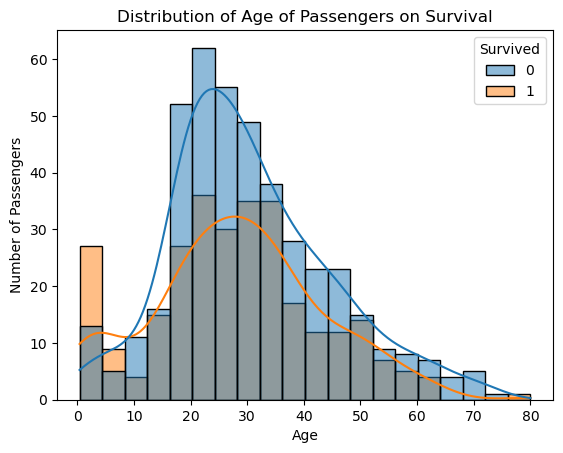

In [46]:
# hist plot on Age
sns.histplot(data=df_titanic,x=df_titanic['Age'],hue="Survived",kde=True)
# df_titanic['Age'].plot(kind="hist",kde=True)
plt.title("Distribution of Age of Passengers on Survival")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")

# show plot
plt.show()

Children have higher survival rate.

[Back to Top](#Table-of-Contents)
